In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Colab Notebooks

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [2]:

import pandas as pd

# File paths
file_path1 = 'sample_e.csv'
file_path2 = 'sample_esg.csv'

# Reading the files
try:
    data1 = pd.read_csv(file_path1)
    data2 = pd.read_csv(file_path2)

    # Displaying the first few rows of each dataset to understand their structure
    data1_head = data1.head()
    data2_head = data2.head()
except Exception as e:
    error_message = str(e)

data1_head, data2_head, error_message if 'error_message' in locals() else 'No error'


(           ISIN        Country         Region              Sector  \
 0  US0844231029  United States  North America  Financial Services   
 1  US0528001094  United States  North America      Transportation   
 2  JP3699400002          Japan   Asia-Pacific      Transportation   
 3  USQ1700EAB85      Australia   Asia-Pacific             Housing   
 4  AU000000BLD2      Australia   Asia-Pacific             Housing   
 
    Environment Score final  Environmental Impact Score final  \
 0                       53                                52   
 1                       43                                28   
 2                       18                                18   
 3                       47                                36   
 4                       47                                36   
 
    Environmental CSR Score final Environmental Impact Grade  \
 0                             53                          B   
 1                             71                         

In [3]:
print(data2["Assets - Total"])
ESG=data2["ESG Score"]
E=data2["E Score"]
S=data2["S Score"]
G=data2["G Score"]
Y=data2["Assets - Total"]

0       48415.0
1       51274.0
2       51396.0
3       60580.0
4       59995.0
         ...   
3074     2542.0
3075     2810.2
3076     2967.2
3077     3069.4
3078     3051.0
Name: Assets - Total, Length: 3079, dtype: float64


In [4]:

grades_mapping = {
    'D-': 1, 'D': 2, 'D+': 3,
    'C-': 4, 'C': 5, 'C+': 6,
    'B-': 7, 'B': 8, 'B+': 9,
    'A-': 10, 'A': 11, 'A+': 12
}

data2['ESG Grade'] = data2['ESG Grade'].replace(grades_mapping)
Y=data2["ESG Grade"]

data2 = data2.apply(pd.to_numeric, errors='coerce')

data2 = data2.dropna(axis=1, how='any')

print(data2)
X = data2.iloc[:, 6:]
print(X)


      Year  ESG Score    E Score    S Score    G Score  ESG Grade  \
0     2015  70.381659  58.469125  78.392611  71.691542          9   
1     2016  70.500020  58.712121  74.099858  78.166947          9   
2     2017  71.978831  61.503940  72.406978  82.870883          9   
3     2018  69.393337  58.662140  72.790600  76.196125          9   
4     2019  69.165517  57.036153  69.127348  82.564010          9   
...    ...        ...        ...        ...        ...        ...   
3074  2017  45.061471  33.009329  59.419719  37.692308          6   
3075  2018  59.941009  45.255850  60.361053  67.847222          8   
3076  2019  59.309582  40.982276  62.165623  66.870748          8   
3077  2020  73.305939  72.010290  82.941602  64.511541          9   
3078  2021  67.562434  64.517059  72.452113  64.452799          9   

      Accumulated Other Comprehensive Income (Loss)  Assets - Other  \
0                                           -4732.0          4580.0   
1                            

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import export_text

from sklearn import tree
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))


[[ 0  0  0  0  1  1  0  0  0  0  0  0]
 [ 0  0  1  1  2  3  0  2  0  0  0  0]
 [ 1  4  6  4  2  5  1  5  1  0  0  0]
 [ 0  0  4  8 11  8  8  1  3  0  0  0]
 [ 0  1  2  5 16 13  8  8  4  3  2  0]
 [ 0  2  1  9 13 17 19 11 13  1  2  0]
 [ 0  1  3  2  8 23 37 25 10  8  2  0]
 [ 0  1  1  3 16 19 24 59 39 13  6  1]
 [ 0  1  2  1  5 12 26 35 59 37  9  1]
 [ 0  0  1  2  7  6 18 17 47 41 13  0]
 [ 0  0  1  0  0  3  4  3  9  6 17  1]
 [ 0  0  0  0  0  0  0  0  2  1  3  0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         9
           3       0.27      0.21      0.24        29
           4       0.23      0.19      0.21        43
           5       0.20      0.26      0.22        62
           6       0.15      0.19      0.17        88
           7       0.26      0.31      0.28       119
           8       0.36      0.32      0.34       182
           9       0.32      0.31      0.31 

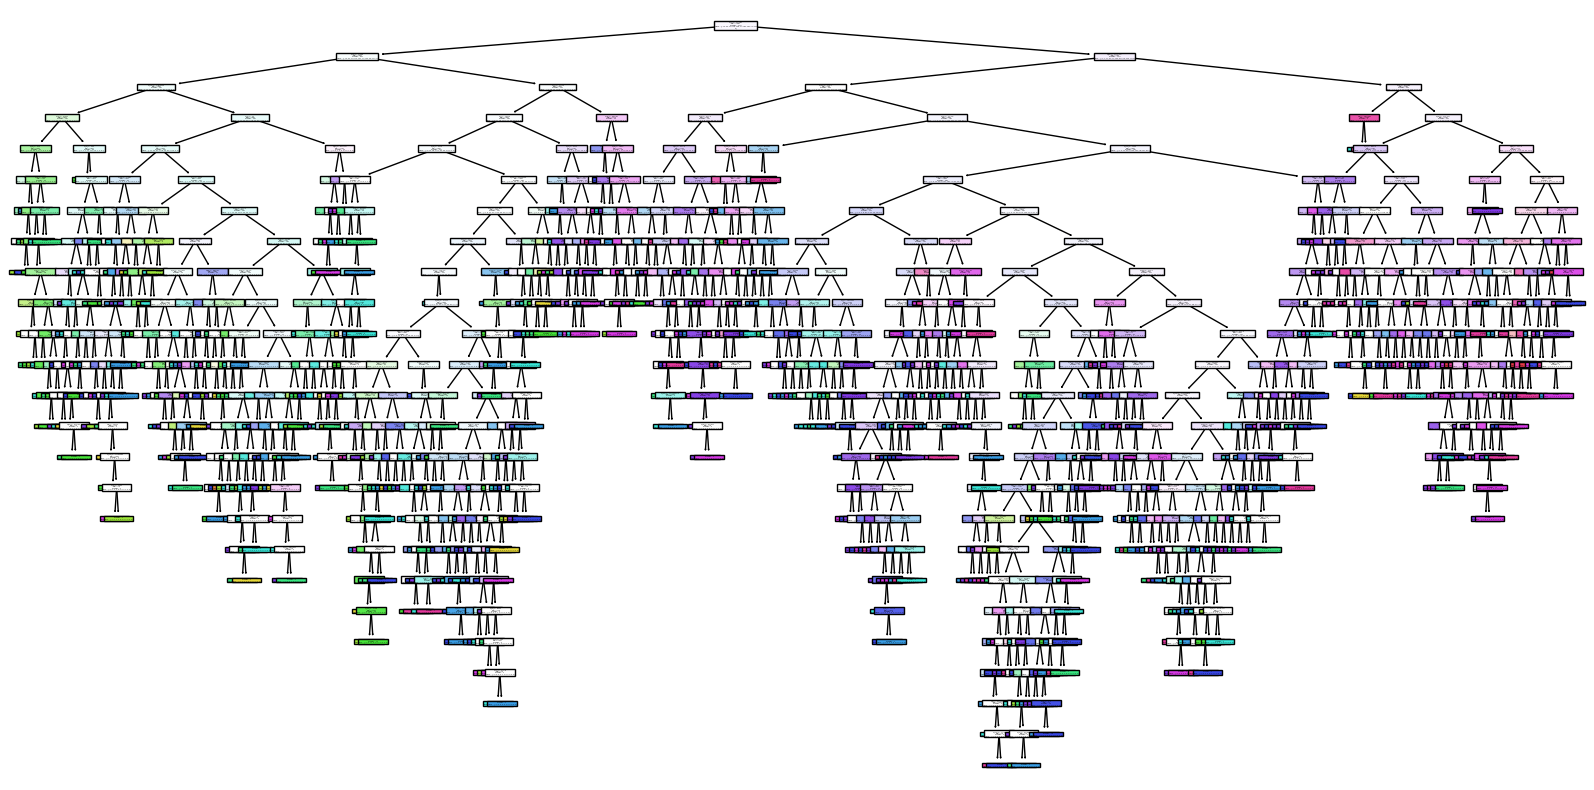

In [6]:
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True)
plt.show()
decision_tree_text = export_text(model, feature_names=list(X.columns))
print(decision_tree_text)


In [7]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, Y_train)
rf_predictions = random_forest_model.predict(X_test)
print(confusion_matrix(Y_test, rf_predictions))
print(classification_report(Y_test, rf_predictions))


[[ 0  0  0  0  0  0  0  1  1  0  0  0]
 [ 0  4  3  2  0  0  0  0  0  0  0  0]
 [ 0  1 10  7  3  3  0  2  3  0  0  0]
 [ 0  0  2 17 12  7  0  4  1  0  0  0]
 [ 0  0  2  4 23 18  9  3  3  0  0  0]
 [ 0  0  0  5 12 41 16 10  4  0  0  0]
 [ 0  0  0  0  4 24 47 25 19  0  0  0]
 [ 0  0  1  1  0 14 27 82 52  5  0  0]
 [ 0  0  0  1  0  5  5 48 91 35  3  0]
 [ 0  0  0  0  0  4  6 14 44 71 13  0]
 [ 0  0  0  0  0  1  0  2  7 14 20  0]
 [ 0  0  0  0  0  0  0  0  0  3  2  1]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.80      0.44      0.57         9
           3       0.56      0.34      0.43        29
           4       0.46      0.40      0.42        43
           5       0.43      0.37      0.40        62
           6       0.35      0.47      0.40        88
           7       0.43      0.39      0.41       119
           8       0.43      0.45      0.44       182
           9       0.40      0.48      0.44 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
feature_importances = random_forest_model.feature_importances_

feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")


Feature: Gross Profit (Loss), Importance: 0.014078478796761834
Feature: Common/Ordinary Shareholders, Importance: 0.01338746411812053
Feature: Accumulated Other Comprehensive Income (Loss), Importance: 0.013158187319843206
Feature: Retained Earnings, Importance: 0.013044337211808397
Feature: Stock Compensation Expense, Importance: 0.013032419156768813
Feature: Cash Dividends (Cash Flow), Importance: 0.012988080705333272
Feature: Assets - Other, Importance: 0.012986526059701298
Feature: Assets and Liabilities - Other - Net Change, Importance: 0.012648609418555194
Feature: Net Deferred Tax Asset (Liab) - Total, Importance: 0.012588203439101487
Feature: Liabilities - Other - Total, Importance: 0.012567724765687769
Feature: Employees, Importance: 0.012181870137590079
Feature: Funds from Operations - Other, Importance: 0.012067627683313263
Feature: Common Shares Issued, Importance: 0.012053310758269743
Feature: Dividends - Total, Importance: 0.011863714749658869
Feature: Receivables - Total

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)
mlp.fit(X_train, Y_train)
predictions = mlp.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))


[[  0   0   0   0   0   0   0   2   0   0   0   0]
 [  0   0   0   0   0   0   1   8   0   0   0   0]
 [  0   0   0   0   0   0   2  26   1   0   0   0]
 [  0   0   0   1   0   0   1  38   3   0   0   0]
 [  0   0   0   0   0   0   5  51   6   0   0   0]
 [  0   0   1   0   0   0   9  73   5   0   0   0]
 [  0   0   0   0   0   0  21  88  10   0   0   0]
 [  0   0   0   0   0   0  28 148   6   0   0   0]
 [  0   0   0   0   0   0  46 139   3   0   0   0]
 [  0   0   0   0   0   0  38 113   1   0   0   0]
 [  0   0   0   0   0   0  10  34   0   0   0   0]
 [  0   0   0   0   0   0   1   3   2   0   0   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        29
           4       1.00      0.02      0.05        43
           5       0.00      0.00      0.00        62
           6       0.00      0.00      0.00        88
        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print(classification_report(Y_test, predictions))

model = DecisionTreeClassifier()
model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print(classification_report(Y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         9
           3       0.41      0.31      0.35        29
           4       0.21      0.19      0.20        43
           5       0.22      0.24      0.23        62
           6       0.17      0.19      0.18        88
           7       0.22      0.27      0.24       119
           8       0.34      0.32      0.33       182
           9       0.30      0.30      0.30       188
          10       0.35      0.30      0.32       152
          11       0.31      0.41      0.35        44
          12       0.00      0.00      0.00         6

    accuracy                           0.28       924
   macro avg       0.21      0.21      0.21       924
weighted avg       0.28      0.28      0.28       924

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:

model =  RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print(classification_report(Y_test, predictions))

model =  RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print(classification_report(Y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.80      0.44      0.57         9
           3       0.56      0.34      0.43        29
           4       0.46      0.40      0.42        43
           5       0.43      0.37      0.40        62
           6       0.35      0.47      0.40        88
           7       0.43      0.39      0.41       119
           8       0.43      0.45      0.44       182
           9       0.40      0.48      0.44       188
          10       0.55      0.47      0.51       152
          11       0.53      0.45      0.49        44
          12       1.00      0.17      0.29         6

    accuracy                           0.44       924
   macro avg       0.49      0.37      0.40       924
weighted avg       0.45      0.44      0.44       924

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       1.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:

model =  MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print(classification_report(Y_test, predictions))

model =  MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)
model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print(classification_report(Y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        29
           4       0.25      0.05      0.08        43
           5       0.08      0.02      0.03        62
           6       0.17      0.16      0.17        88
           7       0.00      0.00      0.00       119
           8       0.21      0.74      0.32       182
           9       0.40      0.01      0.02       188
          10       0.00      0.00      0.00       152
          11       0.06      0.20      0.09        44
          12       0.00      0.00      0.00         6

    accuracy                           0.18       924
   macro avg       0.10      0.10      0.06       924
weighted avg       0.16      0.18      0.09       924

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.33 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
categorical_columns = ['North American Industry Classification Code',"Stock Exchange Code",'North America Industrial Classification System - Historical','Standard Industrial Classification - Historical',\
                 'Cumulative Adjustment Factor by Ex-Date - Calendar','GIC Groups','GIC Industries' ,'GIC Sectors' ,'GIC Sub-Industries' ,'North American Industry Classification Code' ]  # replace with your actual categorical column names
column_transformer = ColumnTransformer(
    [("one_hot_encoder", OneHotEncoder(), categorical_columns)],
    remainder='passthrough'  # this will leave the rest of the columns unchanged
)
X_transformed = column_transformer.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_transformed, Y, test_size=0.3, random_state=42)


model = DecisionTreeClassifier()
model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print(classification_report(Y_test, predictions))

model =  RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print(classification_report(Y_test, predictions))

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)
mlp.fit(X_train, Y_train)
predictions = mlp.predict(X_test)
print(classification_report(Y_test, predictions))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         9
           3       0.24      0.21      0.22        29
           4       0.19      0.16      0.18        43
           5       0.19      0.21      0.20        62
           6       0.14      0.18      0.16        88
           7       0.25      0.29      0.27       119
           8       0.38      0.34      0.36       182
           9       0.35      0.36      0.35       188
          10       0.35      0.28      0.31       152
          11       0.32      0.34      0.33        44
          12       0.00      0.00      0.00         6

    accuracy                           0.29       924
   macro avg       0.20      0.20      0.20       924
weighted avg       0.29      0.29      0.29       924

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       1.00 

In [17]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)
# Decision Tree
dt_scores = cross_val_score(decision_tree, X, Y, cv=5)
print("Decision Tree:", dt_scores, "Average:", dt_scores.mean())

# Random Forest
rf_scores = cross_val_score(random_forest, X, Y, cv=5)
print("Random Forest:", rf_scores, "Average:", rf_scores.mean())

# MLP
mlp_scores = cross_val_score(mlp, X, Y, cv=5)
print("MLP:", mlp_scores, "Average:", mlp_scores.mean())


Decision Tree: [0.15422078 0.11363636 0.14285714 0.13311688 0.15772358] Average: 0.14031094921338821
Random Forest: [0.18344156 0.12337662 0.14123377 0.18831169 0.17398374] Average: 0.16206947524020693
MLP: [0.12824675 0.0974026  0.16883117 0.19318182 0.11056911] Average: 0.1396462886706789


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
# Decision Tree hyperparameters
dt_params = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random Forest hyperparameters
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# MLP hyperparameters
mlp_params = {
    'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}
# Decision Tree GridSearch
dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5, n_jobs=-1, verbose=1)

# Random Forest GridSearch
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, n_jobs=-1, verbose=1)

# MLP GridSearch
mlp_grid_search = GridSearchCV(MLPClassifier(max_iter=1000), mlp_params, cv=5, n_jobs=-1, verbose=1)
# For Decision Tree
dt_grid_search.fit(X, Y)

# For Random Forest
rf_grid_search.fit(X, Y)

# For MLP
mlp_grid_search.fit(X, Y)
# For Decision Tree
dt_mean_scores = dt_grid_search.cv_results_['mean_test_score']
print("Decision Tree - Mean Performance:", dt_mean_scores)
print("Best Performance:", max(dt_mean_scores))
print("Worst Performance:", min(dt_mean_scores))

# For Random Forest
rf_mean_scores = rf_grid_search.cv_results_['mean_test_score']
print("Random Forest - Mean Performance:", rf_mean_scores)
print("Best Performance:", max(rf_mean_scores))
print("Worst Performance:", min(rf_mean_scores))

# For MLP
mlp_mean_scores = mlp_grid_search.cv_results_['mean_test_score']
print("MLP - Mean Performance:", mlp_mean_scores)
print("Best Performance:", max(mlp_mean_scores))
print("Worst Performance:", min(mlp_mean_scores))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Decision Tree - Mean Performance: [0.15394837 0.15524865 0.1627183  0.1520019  0.15232446 0.16011984
 0.15622743 0.15914423 0.1604461  0.14843047 0.14290835 0.14809999
 0.14453173 0.13835867 0.15362158 0.15101943 0.14582621 0.14907718
 0.13738623 0.13901014 0.15329849 0.13705892 0.13738201 0.1542704
 0.14842361 0.15069898 0.15199873 0.14388185 0.14420705 0.14939816
 0.14680287 0.13966107 0.15102365 0.14777531 0.14842414 0.14939975]
Best Performance: 0.1627182979622004
Worst Performance: 0.13705891669306303
Random Forest - Mean Performance: [0.1643327  0.17246225 0.16628814 0.16239415 0.16142435 0.16207317
 0.17473762 0.17538803 0.17213811 0.16596241 0.16563615 0.16466213
 0.16336923 0.16758684 0.16498839 0.16369127 0.16824411 0.16077025
 0.16921603 0.16694172 0.16011878 0.16921603 0.16694172 0.16011878

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
categorical_columns = ['Stock Exchange Code',
                       'North America Industrial Classification System - Historical',
                       'Standard Industrial Classification - Historical',
                       'Cumulative Adjustment Factor by Ex-Date - Calendar',
                       'GIC Groups', 'GIC Industries', 'GIC Sectors', 'GIC Sub-Industries',
                       'North American Industry Classification Code']

numerical_columns = [col for col in X.columns if col not in categorical_columns]
# Numerical data pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler())  # Scale data
])

# Categorical data pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Convert categorical data to one-hot vectors
])
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_columns),
    ('categorical', categorical_pipeline, categorical_columns)
])
from sklearn.ensemble import RandomForestClassifier

full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

full_pipeline.fit(X_train, Y_train)
predictions = full_pipeline.predict(X_test)


In [23]:

print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.57      0.44      0.50         9
           3       0.62      0.34      0.44        29
           4       0.38      0.37      0.38        43
           5       0.43      0.37      0.40        62
           6       0.38      0.42      0.40        88
           7       0.39      0.38      0.39       119
           8       0.45      0.46      0.46       182
           9       0.39      0.52      0.45       188
          10       0.52      0.43      0.47       152
          11       0.56      0.45      0.50        44
          12       0.00      0.00      0.00         6

    accuracy                           0.43       924
   macro avg       0.39      0.35      0.36       924
weighted avg       0.44      0.43      0.43       924

